- build a model such that it creates boxes of ROI around handwriting found on the document
- train it on detecting signature vs handwritten text

In [1]:
%pip install PyMuPDF
%pip install opencv-python
%pip install Pillow
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import fitz
import numpy as np
from PIL import Image
import pytesseract
import cv2
from IPython.display import display

In [23]:
def pdf_to_images(pdf_path):
    # Open the PDF
    doc = fitz.open(pdf_path)
    images = []

    # Loop through each page
    for page_num in range(doc.page_count):
        page = doc[page_num]
        # Convert page to an image
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)

    return images

In [24]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    # Apply thresholding to isolate text
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    return thresh

In [25]:
def extract_handwriting_regions(image):
    # Find contours of the handwriting
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # List to hold the regions of interest (ROIs)
    handwriting_images = []

    # Loop through contours and extract each region
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 30 and h > 30:  # Filter small contours to avoid noise
            # Extract the region of interest
            roi = image[y:y+h, x:x+w]
            handwriting_images.append(Image.fromarray(roi))

    return handwriting_images

In [26]:
def display_image(image, title="Handwriting Image"):
    # Display the image inline in the Jupyter Notebook
    print(title)
    display(image)

In [27]:
def main(pdf_path):
    # Extract images from the PDF
    images = pdf_to_images(pdf_path)

    for i, img in enumerate(images):
        # Preprocess the image to isolate handwriting
        processed_img = preprocess_image(img)
        # Extract handwriting regions
        handwriting_regions = extract_handwriting_regions(processed_img)
        
        # Display each extracted handwriting region
        for j, handwriting_img in enumerate(handwriting_regions):
            display_image(handwriting_img, title=f"Handwriting Region {j+1} on Page {i+1}")


Handwriting Region 1 on Page 1


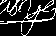

Handwriting Region 2 on Page 1


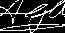

Handwriting Region 3 on Page 1


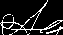

Handwriting Region 4 on Page 1


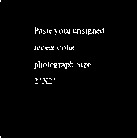

In [28]:
pdf_path = './signed_test_1.pdf'
main(pdf_path)